In [313]:
#IMPORT libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [314]:
df_train_test = pd.read_csv('D:/UNCC/Spring_24/Datasets/house-train.csv')


In [315]:
# # Check data type
pd.options.display.max_rows=90
df_dtype = pd.DataFrame(df_train_test.dtypes,columns=['dtype'])
print(df_dtype.value_counts())
print(df_dtype)

In [316]:
# Features used to modeling
usefull_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'
                , 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces'
                ,'LotFrontage','WoodDeckSF','OpenPorchSF', 'SalePrice',]
df_train_test_prepro = df_train_test[usefull_cols].copy()

# (a)

In [317]:
# Convert all columns to numeric (float) and handle NaN values
df_train_test_prepro = df_train_test_prepro.apply(pd.to_numeric, errors='coerce').fillna(0)

In [318]:
device = torch.device ('cuda' if torch.cuda.is_available() else 'cpu')
print (f'Using device: {device}')

Using device: cuda


In [319]:
# Save the DataFrame to a CSV file
output_file = 'temp/housing_df_train_test_withoutonehot_prepro.csv'
df_train_test_prepro.to_csv(output_file, index=False)
print(f'DataFrame saved to {output_file}')

In [346]:
df = pd.read_csv('temp/housing_df_train_test_withoutonehot_prepro.csv')
print (df.head())
print(df.shape)

   OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0            7       1710         548          856         2       2003   
1            6       1262         460         1262         2       1976   
2            7       1786         608          920         2       2001   
3            7       1717         642          756         1       1915   
4            8       2198         836         1145         2       2000   

   YearRemodAdd  Fireplaces  LotFrontage  WoodDeckSF  OpenPorchSF  SalePrice  
0          2003           0         65.0           0           61     208500  
1          1976           1         80.0         298            0     181500  
2          2002           1         68.0           0           42     223500  
3          1970           1         60.0           0           35     140000  
4          2000           1         84.0         192           84     250000  
(1460, 12)


In [347]:
x = df.drop (['SalePrice'], axis=1).values
y = df['SalePrice'].values

In [348]:
print(x)
print (y)

[[   7. 1710.  548. ...   65.    0.   61.]
 [   6. 1262.  460. ...   80.  298.    0.]
 [   7. 1786.  608. ...   68.    0.   42.]
 ...
 [   7. 2340.  252. ...   66.    0.   60.]
 [   5. 1078.  240. ...   68.  366.    0.]
 [   5. 1256.  276. ...   75.  736.   68.]]
[208500 181500 223500 ... 266500 142125 147500]


In [349]:
print(x.shape)
print(y.shape)

(1460, 11)
(1460,)


In [350]:
from sklearn.model_selection import train_test_split
# Split the data into train and validation sets
x_train_pre, x_val_pre, y_train_pre, y_val_pre = train_test_split(x, y, test_size=0.2, random_state=42)


# Calculate mean and standard deviation of the training data
mean_train = np.mean(x_train_pre, axis=0)
std_train = np.std(x_train_pre, axis=0)
mean_val = np.mean(x_val_pre, axis=0)
std_val = np.std(x_val_pre, axis=0)

# Normalize the training data
x_train = (x_train_pre - mean_train) / std_train

# Normalize the validation data using mean and standard deviation of training data
x_val = (x_val_pre - mean_val) / std_val

x_train = torch.tensor(x_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)

# Calculate mean and standard deviation of the training data
mean_train = np.mean(y_train_pre, axis=0)
std_train = np.std(y_train_pre, axis=0)
mean_val = np.mean(y_val_pre, axis=0)
std_val = np.std(y_val_pre, axis=0)

# Normalize the training data
y_train = (y_train_pre - mean_train) / std_train

# Normalize the validation data using mean and standard deviation of training data
y_val = (y_val_pre - mean_val) / std_val


y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [351]:
# print(x_train, x_val)

In [352]:
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

In [353]:
# Create TensorDatasets and DataLoaders for train and validation sets

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

In [357]:
#Definition of network model class
class regressionnet(nn.Module):
    def __init__(self):
        super(regressionnet, self).__init__()
        self.fc1 = nn.Linear(11, 256)  # 
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 64)  # 
        self.fc5 = nn.Linear(64, 1)
        
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [358]:
# Model, loss function, and optimizer
# Initialize the network
model = regressionnet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum =0.9)

Epoch[1/40], Train Loss: 1.0088, Validation Loss: 1.0014, Validation RMSE: 5.6449
Epoch[2/40], Train Loss: 1.0008, Validation Loss: 0.9998, Validation RMSE: 5.6402
Epoch[3/40], Train Loss: 1.0004, Validation Loss: 0.9997, Validation RMSE: 5.6399
Epoch[4/40], Train Loss: 1.0006, Validation Loss: 0.9997, Validation RMSE: 5.6398
Epoch[5/40], Train Loss: 1.0004, Validation Loss: 0.9997, Validation RMSE: 5.6397
Epoch[6/40], Train Loss: 1.0009, Validation Loss: 0.9997, Validation RMSE: 5.6397
Epoch[7/40], Train Loss: 1.0005, Validation Loss: 0.9996, Validation RMSE: 5.6397
Epoch[8/40], Train Loss: 1.0000, Validation Loss: 0.9997, Validation RMSE: 5.6398
Epoch[9/40], Train Loss: 1.0001, Validation Loss: 0.9997, Validation RMSE: 5.6398
Epoch[10/40], Train Loss: 1.0002, Validation Loss: 0.9996, Validation RMSE: 5.6396
Epoch[11/40], Train Loss: 1.0000, Validation Loss: 0.9997, Validation RMSE: 5.6398
Epoch[12/40], Train Loss: 1.0000, Validation Loss: 0.9997, Validation RMSE: 5.6398
Epoch[13/40],

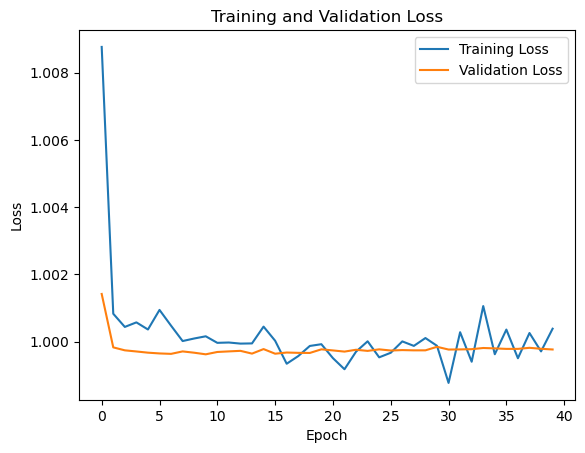

Final Validation RMSE: 5.6400


In [359]:
train_loss_list = []
val_loss_list = []

num_epochs = 40
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
#         print(outputs,loss)
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss
    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

# (b)

In [132]:
usefull_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'
                , 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces'
                ,'LotFrontage','WoodDeckSF','OpenPorchSF'
                ,'ExterQual','Neighborhood','MSZoning'
                ,'Alley','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition', 'SalePrice']
df_train_prepro = df_train_test[usefull_cols].copy()

In [371]:

df_train_prepro = pd.get_dummies(df_train_prepro,columns=['Neighborhood','MSZoning','Alley','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition'])



KeyError: "None of [Index(['Neighborhood', 'MSZoning', 'Alley', 'LotShape', 'LandContour',\n       'Condition1', 'HouseStyle', 'MasVnrType', 'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [134]:
df_train_prepro = df_train_prepro.replace({True: 1, False: 0})

In [135]:
# Convert all columns to numeric (float) and handle NaN values
df_train_prepro = df_train_prepro.apply(pd.to_numeric, errors='coerce').fillna(0)

In [136]:
# Save the DataFrame to a CSV file
output_file = 'temp/housing_df_train_prepro_onehot.csv'
df_train_prepro.to_csv(output_file, index=False)
print(f'DataFrame saved to {output_file}')

DataFrame saved to temp/housing_df_train_prepro_onehot.csv


In [402]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [408]:
df = pd.read_csv('temp/housing_df_train_prepro_onehot.csv')
print(df.head())
print(df.shape)

   OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0            7       1710         548          856         2       2003   
1            6       1262         460         1262         2       1976   
2            7       1786         608          920         2       2001   
3            7       1717         642          756         1       1915   
4            8       2198         836         1145         2       2000   

   YearRemodAdd  Fireplaces  LotFrontage  WoodDeckSF  ...  HouseStyle_SLvl  \
0          2003           0         65.0           0  ...                0   
1          1976           1         80.0         298  ...                0   
2          2002           1         68.0           0  ...                0   
3          1970           1         60.0           0  ...                0   
4          2000           1         84.0         192  ...                0   

   MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_Stone  \
0                 

In [422]:
# Iterate over the columns and check if any of them contain only zeros
zero_columns = []
for column in df.columns:
       if df[column].std() == 0:
#         print(column)
        zero_columns.append(column)

# Print the columns that contain only zeros
print("Columns with only zeros:")
for column in zero_columns:
    print(column)
    

    


Columns with only zeros:
ExterQual


In [410]:

x= df.drop (['SalePrice', 'ExterQual'], axis =1).values
y = df['SalePrice'].values

In [411]:
print (x.shape)

(1460, 77)


In [424]:

# Split the data into train and validation sets
x_train_pre, x_val_pre, y_train_pre, y_val_pre = train_test_split(x, y, test_size=0.2, random_state=42)


# Calculate mean and standard deviation of the training data
mean_train = np.mean(x_train_pre, axis=0)
std_train = np.std(x_train_pre, axis=0)
mean_val = np.mean(x_val_pre, axis=0)
std_val = np.std(x_val_pre, axis=0)

# Normalize the training data
x_train = (x_train_pre - mean_train) / std_train

# Normalize the validation data using mean and standard deviation of training data
epsilon = 1e-8  # A small value to prevent division by zero

# Assuming x_val_pre, mean_val, and std_val are already defined
# Normalize x_val
x_val = (x_val_pre - mean_val) / (std_val + epsilon)


x_train = torch.tensor(x_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)

# Calculate mean and standard deviation of the training data
mean_train = np.mean(y_train_pre, axis=0)
std_train = np.std(y_train_pre, axis=0)
mean_val = np.mean(y_val_pre, axis=0)
std_val = np.std(y_val_pre, axis=0)

# Normalize the training data
y_train = (y_train_pre - mean_train) / std_train

# Normalize the validation data using mean and standard deviation of training data
y_val = (y_val_pre - mean_val) / std_val


y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [425]:
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

In [426]:
# Create TensorDatasets and DataLoaders for train and validation sets

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

In [427]:
#Definition of network model class
class regressionnet(nn.Module):
    def __init__(self):
        super(regressionnet, self).__init__()
        self.fc1 = nn.Linear(77, 500)  # 6 input features
        self.fc2 = nn.Linear(500, 20)
        self.fc3 = nn.Linear(20, 1)  # Output layer with 2 units for width and height
        
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [428]:
# Model, loss function, and optimizer
# Initialize the network
model = regressionnet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

C:\Users\anaconda_navigator\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\anaconda_navigator\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\anaconda_navigator\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they 

Epoch[1/40], Train Loss: 1.0392, Validation Loss: 1.0306, Validation RMSE: 5.7266
Epoch[2/40], Train Loss: 1.0214, Validation Loss: 1.0193, Validation RMSE: 5.6951
Epoch[3/40], Train Loss: 1.0130, Validation Loss: 1.0132, Validation RMSE: 5.6782
Epoch[4/40], Train Loss: 1.0078, Validation Loss: 1.0101, Validation RMSE: 5.6696
Epoch[5/40], Train Loss: 1.0062, Validation Loss: 1.0087, Validation RMSE: 5.6656
Epoch[6/40], Train Loss: 1.0052, Validation Loss: 1.0078, Validation RMSE: 5.6630
Epoch[7/40], Train Loss: 1.0057, Validation Loss: 1.0074, Validation RMSE: 5.6617
Epoch[8/40], Train Loss: 1.0025, Validation Loss: 1.0070, Validation RMSE: 5.6608
Epoch[9/40], Train Loss: 1.0044, Validation Loss: 1.0068, Validation RMSE: 5.6602
Epoch[10/40], Train Loss: 1.0054, Validation Loss: 1.0066, Validation RMSE: 5.6595
Epoch[11/40], Train Loss: 1.0047, Validation Loss: 1.0064, Validation RMSE: 5.6589
Epoch[12/40], Train Loss: 1.0039, Validation Loss: 1.0063, Validation RMSE: 5.6587
Epoch[13/40],

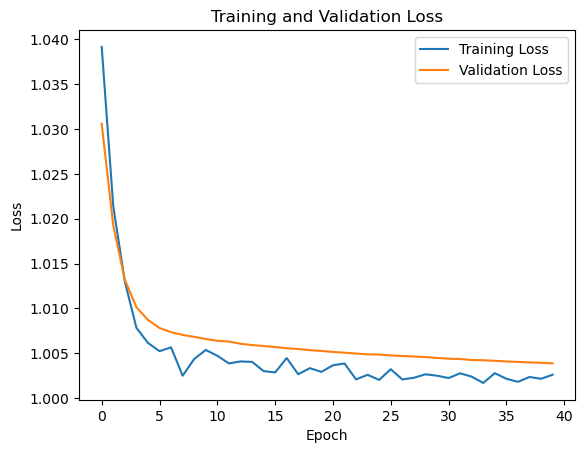

Final Validation RMSE: 5.6518


In [429]:
train_loss_list = []
val_loss_list = []

num_epochs = 40
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

In [432]:
# total_params = sum(p.numel() for p in regressionnet.parameters())
# print(f'Total number of parameters in the model: {total_params}')

# (c)


In [455]:
#Definition of network model class
class regressionnet(nn.Module):
    def __init__(self):
        super(regressionnet, self).__init__()
        self.fc1 = nn.Linear(77, 1024) 
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)  
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 1)
        
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x

In [456]:
# Model, loss function, and optimizer
# Initialize the network
model = regressionnet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

Epoch[1/40], Train Loss: 1.0046, Validation Loss: 1.0040, Validation RMSE: 5.6515
Epoch[2/40], Train Loss: 1.0038, Validation Loss: 1.0033, Validation RMSE: 5.6495
Epoch[3/40], Train Loss: 1.0031, Validation Loss: 1.0028, Validation RMSE: 5.6481
Epoch[4/40], Train Loss: 1.0026, Validation Loss: 1.0023, Validation RMSE: 5.6469
Epoch[5/40], Train Loss: 1.0022, Validation Loss: 1.0019, Validation RMSE: 5.6457
Epoch[6/40], Train Loss: 1.0018, Validation Loss: 1.0016, Validation RMSE: 5.6447
Epoch[7/40], Train Loss: 1.0016, Validation Loss: 1.0013, Validation RMSE: 5.6439
Epoch[8/40], Train Loss: 1.0013, Validation Loss: 1.0010, Validation RMSE: 5.6434
Epoch[9/40], Train Loss: 1.0011, Validation Loss: 1.0008, Validation RMSE: 5.6428
Epoch[10/40], Train Loss: 1.0009, Validation Loss: 1.0007, Validation RMSE: 5.6424
Epoch[11/40], Train Loss: 1.0007, Validation Loss: 1.0006, Validation RMSE: 5.6421
Epoch[12/40], Train Loss: 1.0007, Validation Loss: 1.0005, Validation RMSE: 5.6418
Epoch[13/40],

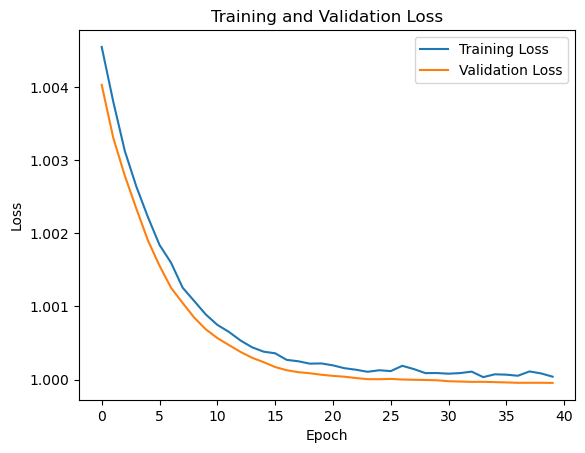

Final Validation RMSE: 5.6405


In [457]:
train_loss_list = []
val_loss_list = []

num_epochs = 40
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')